In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

<function matplotlib.pyplot.show(*args, **kw)>

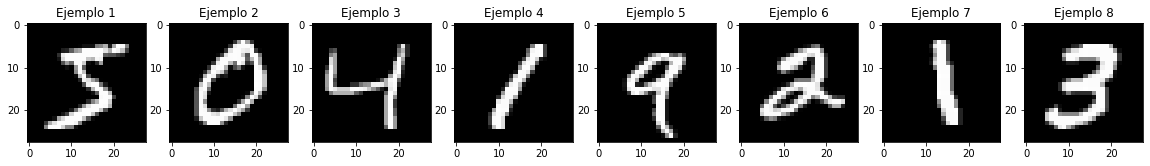

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize = (20,4))

for index, digit in zip (range(1,9), mnist.data[:8]):
    plt.subplot(1,8, index)
    plt.imshow(np.reshape(digit, (28,28)), cmap = plt.cm.gray)
    plt.title('Ejemplo '+ str(index))
plt.show

In [4]:
import pandas as pd
df = pd.DataFrame(mnist.data)
df

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size = 0.25)

In [6]:
from sklearn.linear_model import Perceptron
clf = Perceptron(max_iter = 2000, random_state = 40, n_jobs= -1).fit(X_train, y_train)

In [7]:
#Numero de parametros que forman el modelo
clf.coef_.shape

(10, 784)

In [8]:
#Numero de Parametros bias/intercept
len(clf.intercept_)

10

In [9]:
y_pred = clf.predict(X_test)

In [10]:
from sklearn.metrics import f1_score #Metrica de precision y accuracy en conjunto
f1_score(y_test, y_pred, average ="weighted")

0.863628495825601

In [11]:
index = 0
index_errors = []

for label, predict in zip(y_test, y_pred):
    if label != predict:
        index_errors.append(index)
    index+=1

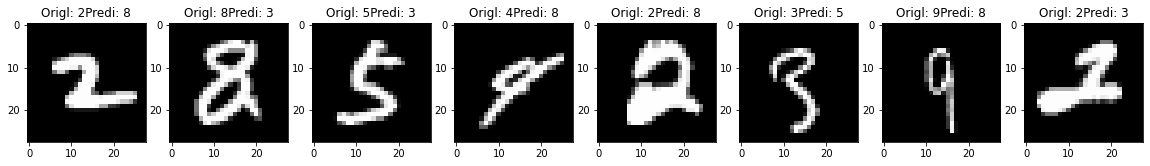

In [30]:
plt.figure(figsize =(20, 4))
for i, img_index in zip(range(1,9), index_errors[8:16]):
    plt.subplot(1,8,i)
    plt.imshow(np.reshape(X_test[img_index], (28,28)), cmap = plt.cm.gray)
    plt.title('Origl: '+str(y_test[img_index]) + "Predi: "+ str(y_pred[img_index]))